# TP PYTHON

#### Par binome :
#### Khadim NGOM
#### Abdoul Wahab LY

## TP1 : Pré-traitement des données : les méthodes de visualisation et de description

### Travail à faire

1. Présenter la base de données attribuée,
2. Procéder au chargement de la base de données

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [242]:
hopital = pd.read_csv("satisfaction_hopital.csv",sep=";")
hopital

,service,sexe,age,profession,amelioration.sante,amelioration.moral,recommander,score.relation,"score,information"
0,3,0,41.0,4.0,1.0,0.0,1.0,36.0,22.0
1,3,1,29.0,8.0,2.0,3.0,2.0,33.0,36.0
2,3,1,83.0,2.0,2.0,1.0,2.0,40.0,37.0
3,3,0,66.0,3.0,2.0,0.0,2.0,32.0,35.0
4,3,1,84.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
529,8,1,81.0,NaN,NaN,NaN,NaN,NaN,NaN
530,8,0,69.0,NaN,NaN,NaN,NaN,NaN,NaN
531,8,1,30.0,4.0,2.0,1.0,1.0,32.0,NaN
532,8,1,30.0,8.0,1.0,2.0,2.0,30.0,34.0


On renomme certains colonnes

In [245]:
# Renommer les colonnes existantes  
hopital.rename(columns={'amelioration.sante': 'amelioration_sante',
                         'amelioration.moral': 'amelioration_moral',
                        'score.relation': 'score_relation', 
                         'score,information': 'score_information'}, inplace=True)

In [247]:
hopital.head()

,service,sexe,age,profession,amelioration_sante,amelioration_moral,recommander,score_relation,score_information
0,3,0,41.0,4.0,1.0,0.0,1.0,36.0,22.0
1,3,1,29.0,8.0,2.0,3.0,2.0,33.0,36.0
2,3,1,83.0,2.0,2.0,1.0,2.0,40.0,37.0
3,3,0,66.0,3.0,2.0,0.0,2.0,32.0,35.0
4,3,1,84.0,NaN,NaN,NaN,NaN,NaN,NaN


In [249]:
hopital.shape

(534, 9)

In [251]:
# Quels types variables on a:
hopital.dtypes.value_counts()

float64    7
int64      2
Name: count, dtype: int64

In [253]:
# cette fonction vérifie si un nombre est NAN
hopital.isna()

,service,sexe,age,profession,amelioration_sante,amelioration_moral,recommander,score_relation,score_information
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
529,False,False,False,True,True,True,True,True,True
530,False,False,False,True,True,True,True,True,True
531,False,False,False,False,False,False,False,False,True
532,False,False,False,False,False,False,False,False,False


<Axes: >

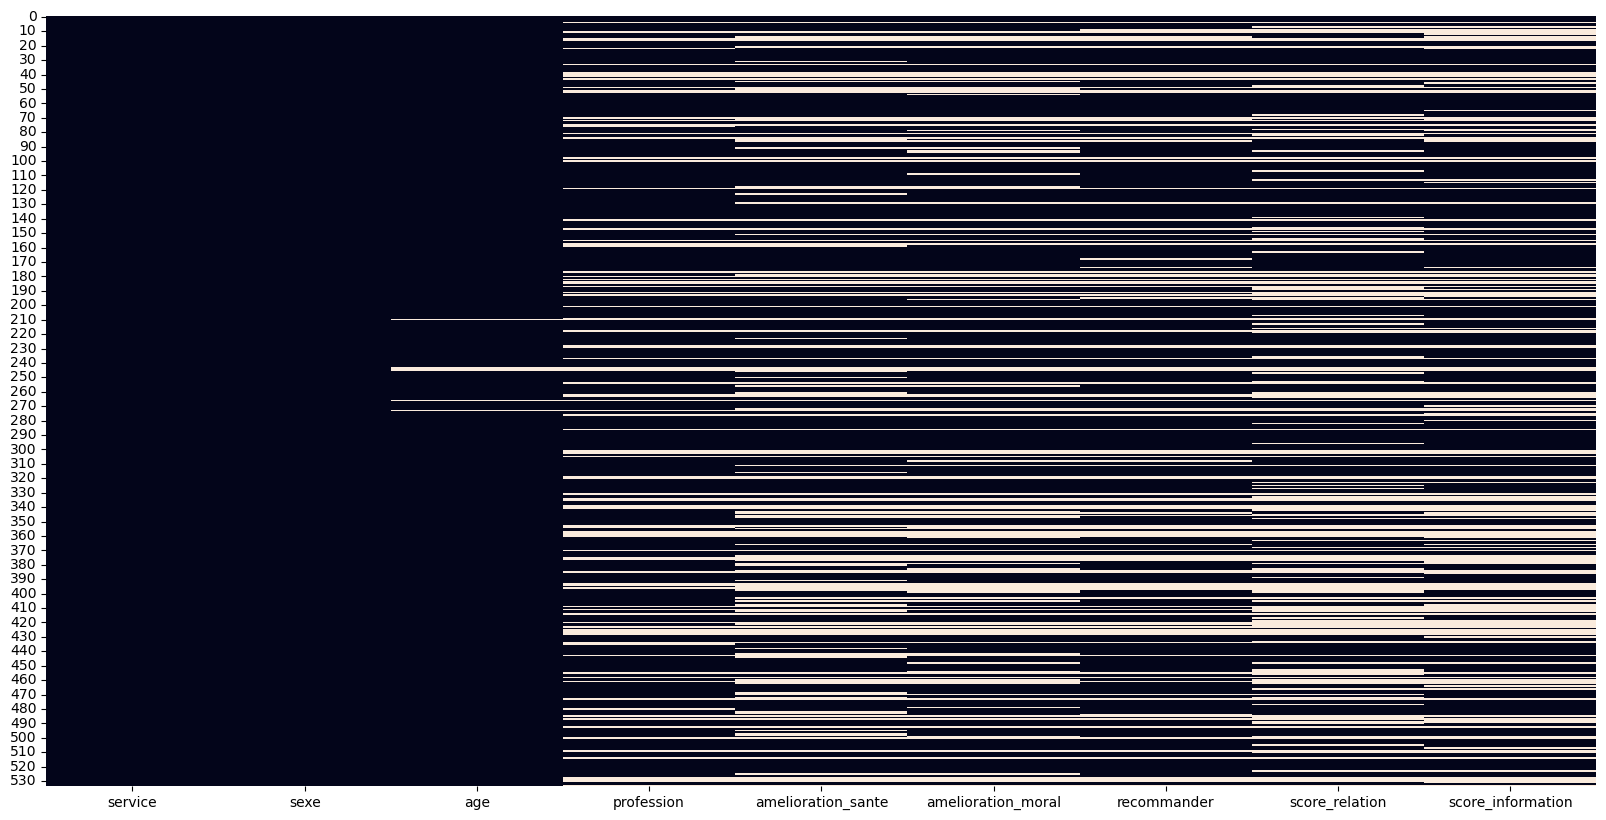

In [255]:
# Visualisation avec seaborn
plt.figure(figsize=(20,10))
sns.heatmap(hopital.isna(),cbar=False)

Donc il y'a des valeurs manquantes

In [257]:
# Pour savoir le pourcentage des valeurs manquantes en le triant
(hopital.isna().sum()/hopital.shape[0]).sort_values(ascending=True)

service               0.000000
sexe                  0.000000
age                   0.011236
profession            0.200375
recommander           0.241573
amelioration_moral    0.282772
amelioration_sante    0.295880
score_information     0.329588
score_relation        0.346442
dtype: float64

**Les colonnes ayant des valeurs manquantes représentent moins de 90 %, il n'est donc pas nécessaire de les éliminer. En revanche, nous allons supprimer les lignes qui contiennent des valeurs manquantes**

Avant d'éliminer les valeurs manquantes on fait une copie du dataset

In [262]:
df_copy = hopital.copy()
df_copy

,service,sexe,age,profession,amelioration_sante,amelioration_moral,recommander,score_relation,score_information
0,3,0,41.0,4.0,1.0,0.0,1.0,36.0,22.0
1,3,1,29.0,8.0,2.0,3.0,2.0,33.0,36.0
2,3,1,83.0,2.0,2.0,1.0,2.0,40.0,37.0
3,3,0,66.0,3.0,2.0,0.0,2.0,32.0,35.0
4,3,1,84.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
529,8,1,81.0,NaN,NaN,NaN,NaN,NaN,NaN
530,8,0,69.0,NaN,NaN,NaN,NaN,NaN,NaN
531,8,1,30.0,4.0,2.0,1.0,1.0,32.0,NaN
532,8,1,30.0,8.0,1.0,2.0,2.0,30.0,34.0


Supprimer les lignes ou on observe les données manquantes en utilisant la fonction dropna

In [265]:
df_clean = df_copy.dropna(axis=0)
df_clean

,service,sexe,age,profession,amelioration_sante,amelioration_moral,recommander,score_relation,score_information
0,3,0,41.0,4.0,1.0,0.0,1.0,36.0,22.0
1,3,1,29.0,8.0,2.0,3.0,2.0,33.0,36.0
2,3,1,83.0,2.0,2.0,1.0,2.0,40.0,37.0
3,3,0,66.0,3.0,2.0,0.0,2.0,32.0,35.0
5,3,0,84.0,6.0,3.0,3.0,2.0,39.0,28.0
...,...,...,...,...,...,...,...,...,...
522,8,1,77.0,8.0,2.0,2.0,2.0,39.0,25.0
524,8,1,58.0,3.0,3.0,1.0,2.0,37.0,35.0
526,8,1,69.0,4.0,3.0,1.0,2.0,40.0,31.0
527,8,1,67.0,4.0,3.0,3.0,2.0,38.0,35.0


In [267]:
df_clean.shape

(287, 9)

3. Réaliser un aperçu des données

a. Calculer les statistiques de bases

In [271]:
df_clean.describe()

,service,sexe,age,profession,amelioration_sante,amelioration_moral,recommander,score_relation,score_information
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,4.470383,0.445993,54.013937,4.379791,2.247387,1.686411,1.658537,35.038328,31.832753
std,2.255916,0.497943,16.669551,1.694915,0.769696,0.953054,0.543675,4.761654,6.719654
min,1.000000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,13.000000,13.000000
25%,3.000000,0.000000,43.000000,3.000000,2.000000,1.000000,1.000000,33.000000,28.000000
50%,5.000000,0.000000,55.000000,4.000000,2.000000,1.000000,2.000000,36.000000,33.000000
75%,6.000000,1.000000,66.000000,5.000000,3.000000,3.000000,2.000000,39.000000,38.000000
max,8.000000,1.000000,89.000000,8.000000,3.000000,3.000000,2.000000,40.000000,40.000000


b.Visualiser les données en traçant les histogrammes de toutes les variables

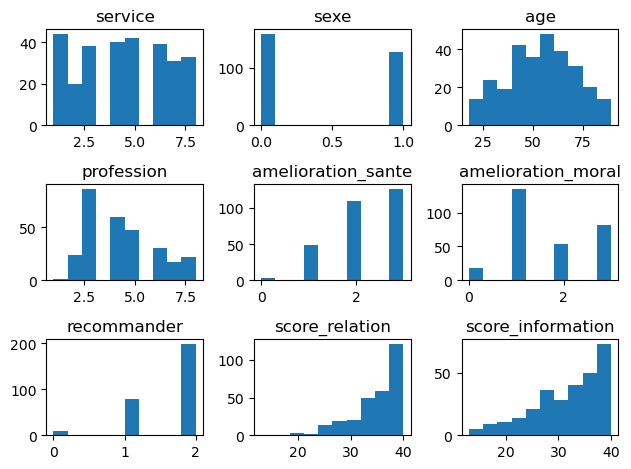

In [274]:
for i in np.arange(1,10):
        plt.subplot(3, 3, i)
        plt.title(df_clean.columns[i-1])
        plt.hist(df_clean[df_clean.columns[i-1]])
        plt.tight_layout()

In [277]:
rep_age_sex = pd.crosstab(df_clean['age'],df_clean['sexe'])
rep_age_sex

sexe,0,1
age,,
18.0,1,2
19.0,0,1
20.0,1,0
21.0,1,2
22.0,1,1
...,...,...
84.0,3,3
85.0,0,1
86.0,1,0


<Axes: xlabel='sexe'>

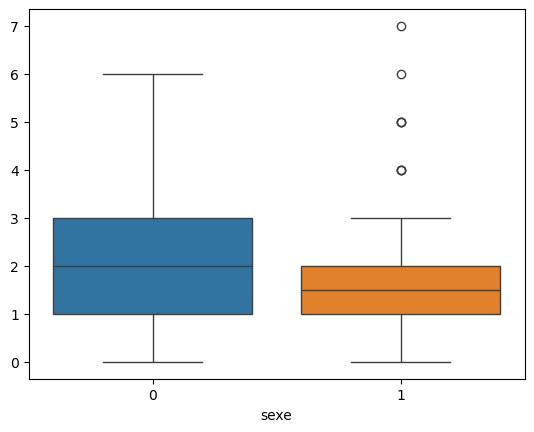

In [279]:
sns.boxplot(rep_age_sex)

d. Tracer le diagramme en barre de l’effectif de chaque numéro de service

<Axes: xlabel='service'>

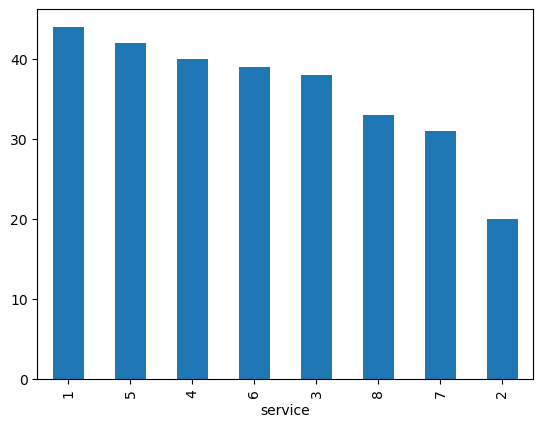

In [282]:
df_clean['service'].value_counts().plot.bar()

4. Traiter les données en remplaçant les données manquantes de chaque variable par sa moyenne.

Une copie de l'originale

In [286]:
data = hopital.copy()
data

,service,sexe,age,profession,amelioration_sante,amelioration_moral,recommander,score_relation,score_information
0,3,0,41.0,4.0,1.0,0.0,1.0,36.0,22.0
1,3,1,29.0,8.0,2.0,3.0,2.0,33.0,36.0
2,3,1,83.0,2.0,2.0,1.0,2.0,40.0,37.0
3,3,0,66.0,3.0,2.0,0.0,2.0,32.0,35.0
4,3,1,84.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
529,8,1,81.0,NaN,NaN,NaN,NaN,NaN,NaN
530,8,0,69.0,NaN,NaN,NaN,NaN,NaN,NaN
531,8,1,30.0,4.0,2.0,1.0,1.0,32.0,NaN
532,8,1,30.0,8.0,1.0,2.0,2.0,30.0,34.0


On remplace les données manquantes de chaque variable par la moyenne en utilisant **fillna**

In [289]:
data_clean = data.fillna(data[data.columns].mean())
data_clean

,service,sexe,age,profession,amelioration_sante,amelioration_moral,recommander,score_relation,score_information
0,3,0,41.0,4.000000,1.000000,0.000000,1.000000,36.000000,22.000000
1,3,1,29.0,8.000000,2.000000,3.000000,2.000000,33.000000,36.000000
2,3,1,83.0,2.000000,2.000000,1.000000,2.000000,40.000000,37.000000
3,3,0,66.0,3.000000,2.000000,0.000000,2.000000,32.000000,35.000000
4,3,1,84.0,4.430913,2.231383,1.678851,1.624691,35.217765,31.910615
...,...,...,...,...,...,...,...,...,...
529,8,1,81.0,4.430913,2.231383,1.678851,1.624691,35.217765,31.910615
530,8,0,69.0,4.430913,2.231383,1.678851,1.624691,35.217765,31.910615
531,8,1,30.0,4.000000,2.000000,1.000000,1.000000,32.000000,31.910615
532,8,1,30.0,8.000000,1.000000,2.000000,2.000000,30.000000,34.000000


5. Effectuer une réduction de dimension de la base par l'application de l'Analyse en composantes principales.

a. Analyser le nuage des variables (cercle des corrélations) : Quelles sont les variables qui semblent bien représentées ? Quelles sont les variables moins bien représentées ? Quelles sont les variables paraissant assez fortement corrélées à chacun des axes ? Tenter d'expliquer qualitativement l'information portée par chacun des deux premiers axes de l'ACP.

On importe les bibliothéque sklearn pour faire de l'ACP

In [294]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [296]:
# Standardiser les données
scaler = StandardScaler()
data_clean_scaled = scaler.fit_transform(data_clean)

In [298]:
data_clean_scaled

array([[-6.80687025e-01, -9.96261669e-01, -9.72868445e-01, ...,
        -1.28119282e+00,  2.09574017e-01, -1.78425392e+00],
       [-6.80687025e-01,  1.00375236e+00, -1.65113588e+00, ...,
         7.69728490e-01, -5.94176884e-01,  7.36231044e-01],
       [-6.80687025e-01,  1.00375236e+00,  1.40106758e+00, ...,
         7.69728490e-01,  1.28124189e+00,  9.16265685e-01],
       ...,
       [ 1.51693614e+00,  1.00375236e+00, -1.59461360e+00, ...,
        -1.28119282e+00, -8.62093851e-01,  6.39611530e-16],
       [ 1.51693614e+00,  1.00375236e+00, -1.59461360e+00, ...,
         7.69728490e-01, -1.39792778e+00,  3.76161763e-01],
       [ 1.51693614e+00, -9.96261669e-01, -4.64167867e-01, ...,
         4.55396011e-16,  0.00000000e+00,  6.39611530e-16]])

In [300]:
# Appliquer l'ACP
pca = PCA(n_components=2)
data_clean_pca = pca.fit_transform(data_clean_scaled)

In [302]:
data_clean_pca

array([[-2.92507255, -0.99082133],
       [ 0.73656203,  2.63165782],
       [ 0.84480793, -1.13293614],
       ...,
       [-1.48959562,  0.79897987],
       [-0.75710759,  2.80448062],
       [ 0.18739836, -0.20675023]])

In [304]:
# Créer un DataFrame des résultats
df_pca = pd.DataFrame(data_clean_pca, columns=["C1", "C2"], index=data_clean.index)
print(df_pca)

           C1        C2
0   -2.925073 -0.990821
1    0.736562  2.631658
2    0.844808 -1.132936
3   -0.789972 -1.806087
4   -0.101407  0.183824
..        ...       ...
529  0.077023  0.625975
530  0.206303 -0.405210
531 -1.489596  0.798980
532 -0.757108  2.804481
533  0.187398 -0.206750

[534 rows x 2 columns]


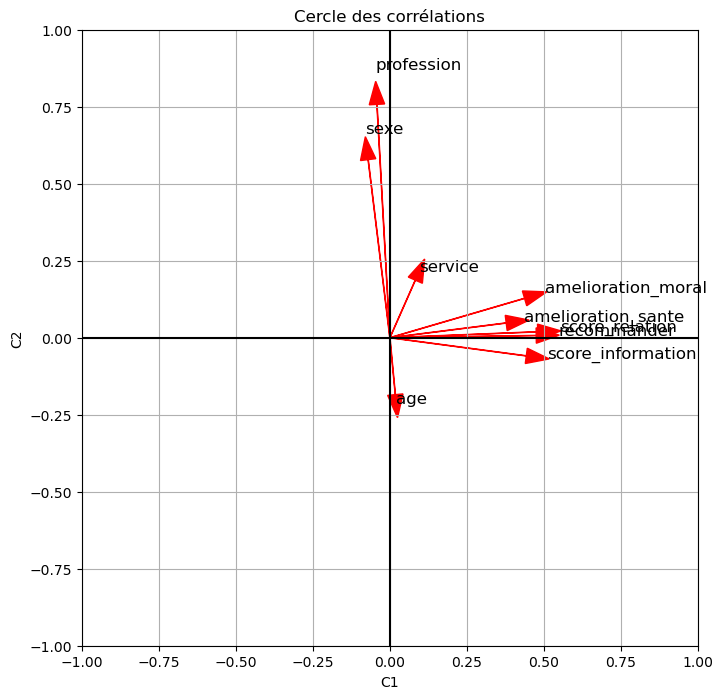

In [306]:
def plot_correlation_circle(pca, features):
    pcs = pca.components_
    plt.figure(figsize=(8, 8))
    for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
        plt.arrow(0, 0, x, y, head_width=0.05, color='r')
        plt.text(x * 1.15, y * 1.15, features[i], fontsize=12)

    plt.xlabel("C1")
    plt.ylabel("C2")
    plt.title("Cercle des corrélations")
    plt.grid()
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

plot_correlation_circle(pca, data_clean.columns)


 ##### Variables bien représentées (près du bord du cercle) ?
   
Les variables bien représentées sont celles qui ont une longueur de vecteur proche de 1, c’est-à-dire situées près du bord du cercle. Elles sont fortement corrélées avec le plan formé par la composante 1 (C1) et la composante 2 (C2).

**amelioration_moral, amelioration_sante, recommander, score_relation et score_information** sont bien représentées. Leurs flèches sont longues et pointent vers la droite, ce qui montre une forte contribution au premier axe (C1).

**sexe et profession** sont bien représentées. Leurs flèches sont longues et pointent vers le haut, ce qui montre une forte contribution au deuxieme axe (C2).

##### Variables moins bien représentées (près du centre) ?
Les variables mal représentées sont courtes ou proches du centre du cercle. Elles ont une faible contribution à C1 et C2, donc leur interprétation dans ce plan est limitée.

**age et service** sont mal représentées.

##### Variables fortement corrélées aux axes ?
Axe 1 (C1) :

Variables fortement corrélées positivement sont **amelioration_moral, amelioration_sante, recommander, score_relation, score_information**

Axe 2 (C2) :

Variables corrélées positivement sont **sexe, profession**

**age** corrélées negativement

##### Interprétation qualitative des axes ?
Composante 1 (C1) :
Représente une dimension "bénéfice perçu" ou "efficacité perçue"

Les variables amelioration_moral, santé, score_information, recommander, score_relation indiquent que cet axe capte la perception positive de l’intervention ou du dispositif évalué.

Plus une observation est positionnée à droite de C1, plus elle a probablement perçu des effets bénéfiques.

Composante 2 (C2) :
Semble capter une dimension sociodémographique

âge (corrélé négativement), sexe et profession (positivement) suggèrent que les caractéristiques personnelles ou sociales influencent cette dimension.

Cela peut représenter par exemple une opposition entre jeunes/hommes/certaines professions et personnes plus âgées/femmes/autres professions.

**%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%**

b. Analyser le nuage d'individus : Quel est son aspect général ? Des groupes semblent ils se former ? Peut-on identifier des individus mal représentés ? y a-t-il des individus qui paraissent proches sur le plan factoriel (1,2) mais qui n'étaient pas forcément très proches dans la base initiale ?

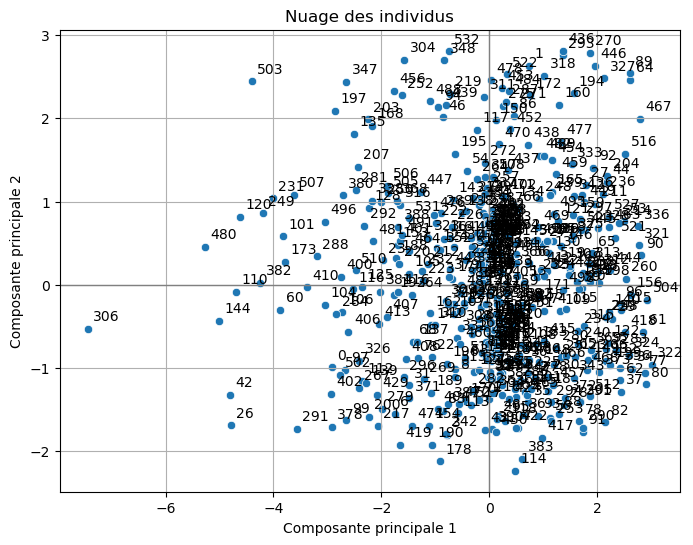

In [313]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="C1", y="C2", data=df_pca)
for i in df_pca.index:
    plt.text(df_pca.loc[i, "C1"]+0.1, df_pca.loc[i, "C2"]+0.1, i)
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)
plt.title("Nuage des individus")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.grid()
plt.show()


#### Aspect général du nuage?

Le nuage a une forme allongée verticalement, avec une forte concentration des individus autour de la composante 1 = 0.

Cela indique que la composante 1 (axe horizontal) n'explique qu'une partie modérée de la variabilité globale.

La majorité des individus ont une valeur similaire sur l'axe 1, mais une variabilité importante sur l’axe 2 (vertical).

#### Des groupes semblent-ils se former ?

On observe une forte densité centrale, mais aucun groupe bien distinct ne ressort visuellement.

Cela peut indiquer :

soit une population homogène sans sous-groupes nets,

soit une structure latente plus complexe non révélée par les deux premiers axes.

Cependant, quelques points isolés aux extrémités (ex. : à gauche ou en haut) peuvent appartenir à des sous-groupes rares ou atypiques.

#### Individus mal représentés ?

Les individus proches du centre du graphique (autour de (0,0)) sont mal représentés dans ce plan factoriel.

Cela signifie que leur qualité de représentation (cos²) est faible sur les deux premiers axes.

Ces individus contribuent peu à la structure révélée par l'ACP → leur profil est mieux décrit par d'autres axes (PC3, PC4…).

#### Proximité en projection mais pas dans les données initiales ?

Oui, c’est possible :

L’ACP projette les individus dans un espace réduit (2D), donc certaines distances sont approximées.

Deux individus proches dans le plan (1,2) peuvent en réalité être différents sur les variables peu représentées par ces deux axes.

Par exemple :

Les points numérotés 101 et 103 peuvent sembler proches ici, mais peuvent être différents dans les variables comme "âge" ou "sexe", peu représentées par C1/C2.

**%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%**

c. Quelles sont les variables qui contribuent pour la composition de chaque composante principale ?

In [320]:
# Contributions (carrés des composantes)
contrib = pd.DataFrame(np.square(pca.components_), columns=data_clean.columns, index=["C1", "C2"])
print(contrib.T.sort_values("C1", ascending=False))

                          C1        C2
score_relation      0.230586  0.000369
recommander         0.225692  0.000051
score_information   0.196123  0.003474
amelioration_moral  0.191140  0.016338
amelioration_sante  0.142584  0.002290
service             0.006815  0.034945
sexe                0.004986  0.334384
profession          0.001765  0.573998
age                 0.000310  0.034151


**score_relation, recommander, score_information, amelioration_moral, amelioration_sante** contribuent pour la composante principale **C1**

**sexe, profession** pour la composante **C2**

**%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%**

d. Si vous pouvez déduire les variables les plus pertinentes, donnez le classement de leur importance.

In [324]:
# Somme des contributions
contrib["Total"] = contrib.sum(axis=1)
total_contrib = contrib.sort_values("Total", ascending=False)
print(total_contrib.T)

                          C1        C2
service             0.006815  0.034945
sexe                0.004986  0.334384
age                 0.000310  0.034151
profession          0.001765  0.573998
amelioration_sante  0.142584  0.002290
amelioration_moral  0.191140  0.016338
recommander         0.225692  0.000051
score_relation      0.230586  0.000369
score_information   0.196123  0.003474
Total               1.000000  1.000000


Les variables les plus pertinentes sont **score_relation, recommander, score_information, amelioration_moral, amelioration_sante,sexe, profession**

**%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%**

6. Faites une synthèse générale des pré-traitements qui ont été nécessaire pour la préparation de la base de données.

**1. Nettoyage des données**
   
**Suppression et remplacement des valeurs manquantes** :
Des vérifications ont été faites pour identifier les NaN. Les lignes ou colonnes avec des valeurs manquantes non pertinentes ont été éliminées et ensuite remplaçés par leurs moyennes.

**Correction de noms de variables incohérents** :
Exemple : Les variables ont été renommées correctement si besoin pour garantir l'uniformité dans le traitement

**2. Statistiques de base**

Utiliser describe pour calculer les statistiques de bases

**3. Visualisations**

Visualiser les données avec des histogrammes et boxplot

**4. Centrage et réduction des variables**

Étape indispensable pour l’ACP :

Toutes les variables ont été centrées (moyenne = 0) et réduites (écart-type = 1) afin d’avoir le même poids dans l’analyse, peu importe leur échelle initiale.

**5. Vérification de la qualité des variables**

Analyse de la variance et des corrélations pour évaluer si certaines variables étaient trop peu informatives ou redondantes.

**6. Préparation à l’ACP**

Calcul des contributions des variables aux axes principaux (C1 et C2).

Interprétation des valeurs propres et choix du nombre d’axes à conserver.

Réduction potentielle de la base aux variables les plus contributives pour simplifier l’analyse

## TP2 : Les méthodes de structuration et de classification en apprentissage supervisé

In [336]:
# charger les données
sonar = pd.read_csv("sonar.all-data.csv", names=["F1", "F2", "F3", "F4", "F5", "F6", "F7", "F8", "F9", "F10", "F11", 
                                                              "F12", "F13", "F14", "F15", "F16", "F17", "F18", "F19", "F20", "F21", 
                                                              "F22", "F23", "F24", "F25", "F26", "F27", "F28", "F29", "F30", "F31",
                                                              "F32", "F33", "F34", "F35", "F36", "F37", "F38", "F39", "F40", "F41", 
                                                              "F42", "F43", "F44", "F45", "F46", "F47", "F48", "F49", "F50", "F51",
                                                              "F52", "F53", "F54", "F55", "F56", "F57", "F58", "F59", "F60", "OBJECT"])

Afficher les premières lignes de la base de données

In [351]:
sonar.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F52,F53,F54,F55,F56,F57,F58,F59,F60,OBJECT
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


Combien de classes ?

In [394]:
sonar['OBJECT'].value_counts()

OBJECT
M    111
R     97
Name: count, dtype: int64

**Nous avons deux classes M et R**

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Combien de caractéristiques descriptives ? De quels types ?

In [342]:
# Quels types variables on a:
sonar.dtypes.value_counts()

float64    60
object      1
Name: count, dtype: int64

**On a 60 Variables quantitatives et 1 Variables qualitatives**

Calculer les statistiques de base des variables 2 à 7

In [362]:
(sonar[sonar.columns[2:8]]).describe()

,F3,F4,F5,F6,F7,F8
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799
std,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152
min,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500
25%,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425
50%,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100
75%,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600
max,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000


Combien d’exemples ?

In [365]:
sonar.shape

(208, 61)

**208 exemples**

Combien d’exemples de chaque classe ?

In [375]:
sonar['OBJECT'].value_counts()

OBJECT
M    111
R     97
Name: count, dtype: int64

**classe M : 111 exemples**

**classe R : 97 exemples**

Comment sont organisés les exemples ?

Les exemples sont organisés dans un **format tabulaire**, où :

Chaque **ligne** représente un seul exemple ou une observation.

Chaque **colonne** représente une caractéristique spécifique (caractéristique descriptive) ou la classe cible ('OBJECT').

Les caractéristiques sont numériques, et la dernière colonne contient l'étiquette de classe pour chaque exemple.

### Séparation des données en bases d’apprentissage et de test

In [410]:
code = {
        'M': 1,
        'R': 0,
    }
for col in sonar.select_dtypes('object'):
    sonar[col] = sonar[col].map(code)

In [412]:
y=sonar['OBJECT']
X=sonar[sonar.columns[:-1]]

In [414]:
X

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F51,F52,F53,F54,F55,F56,F57,F58,F59,F60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [416]:
y

0      0
1      0
2      0
3      0
4      0
      ..
203    1
204    1
205    1
206    1
207    1
Name: OBJECT, Length: 208, dtype: int64

In [418]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=5)
print('X_train_set:',X_train.shape)
print('X_test_set:',X_test.shape)
print('y_train_set:',y_train.shape)
print('y_test_set:',y_test.shape)

X_train_set: (145, 60)
X_test_set: (63, 60)
y_train_set: (145,)
y_test_set: (63,)


##### A. Partie 1 : Les k plus proches voisins

In [421]:
from sklearn.neighbors import KNeighborsClassifier

In [423]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier()

In [431]:
print('train_score:',model.score(X_train,y_train))
print('test_score:',model.score(X_test,y_test))

train_score: 0.8344827586206897
test_score: 0.746031746031746


In [433]:
predicted = model.predict(X_test)
expected = y_test

In [435]:
from sklearn.metrics import confusion_matrix
confusion_matrix(expected,predicted)

array([[16, 12],
       [ 4, 31]], dtype=int64)

**Jouer avec le paramètre k**

In [468]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_neighbors':np.arange(1,90),'metric': ['euclidean','manhattan']}
grid=GridSearchCV(KNeighborsClassifier(),param_grid,cv=4)
grid.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89])})

In [470]:
grid.best_score_

0.8412162162162163

In [472]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 2}

In [474]:
model=grid.best_estimator_

In [476]:
from sklearn.model_selection import learning_curve
N,train_score,val_score= learning_curve(model,X_train,y_train,train_sizes=np.linspace(0.1,1.0,10),cv=4)

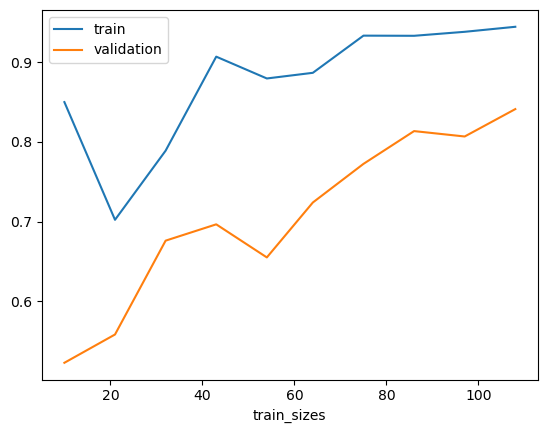

In [478]:
plt.plot(N,train_score.mean(axis=1),label='train')
plt.plot(N,val_score.mean(axis=1),label='validation')
plt.xlabel('train_sizes')
plt.legend()

### B. Partie 2 : Arbres de décision et leurs évolutions en Forêt saléatoires

In [488]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [498]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [500]:
print("train:",model.score(X_train, y_train))
print("test:",model.score(X_test, y_test))

train: 1.0
test: 0.6507936507936508


[Text(0.4625, 0.9375, 'F12 <= 0.195\ngini = 0.499\nsamples = 145\nvalue = [69, 76]\nclass = 1'),
 Text(0.25, 0.8125, 'F4 <= 0.059\ngini = 0.286\nsamples = 52\nvalue = [43, 9]\nclass = 0'),
 Text(0.35625, 0.875, 'True  '),
 Text(0.15, 0.6875, 'F27 <= 0.283\ngini = 0.089\nsamples = 43\nvalue = [41, 2]\nclass = 0'),
 Text(0.1, 0.5625, 'F47 <= 0.334\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = 1'),
 Text(0.05, 0.4375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 1'),
 Text(0.15, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(0.2, 0.5625, 'gini = 0.0\nsamples = 40\nvalue = [40, 0]\nclass = 0'),
 Text(0.35, 0.6875, 'F15 <= 0.521\ngini = 0.346\nsamples = 9\nvalue = [2, 7]\nclass = 1'),
 Text(0.3, 0.5625, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]\nclass = 1'),
 Text(0.4, 0.5625, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = 0'),
 Text(0.675, 0.8125, 'F52 <= 0.005\ngini = 0.403\nsamples = 93\nvalue = [26.0, 67.0]\nclass = 1'),
 Text(0.5687500000000001, 0.875

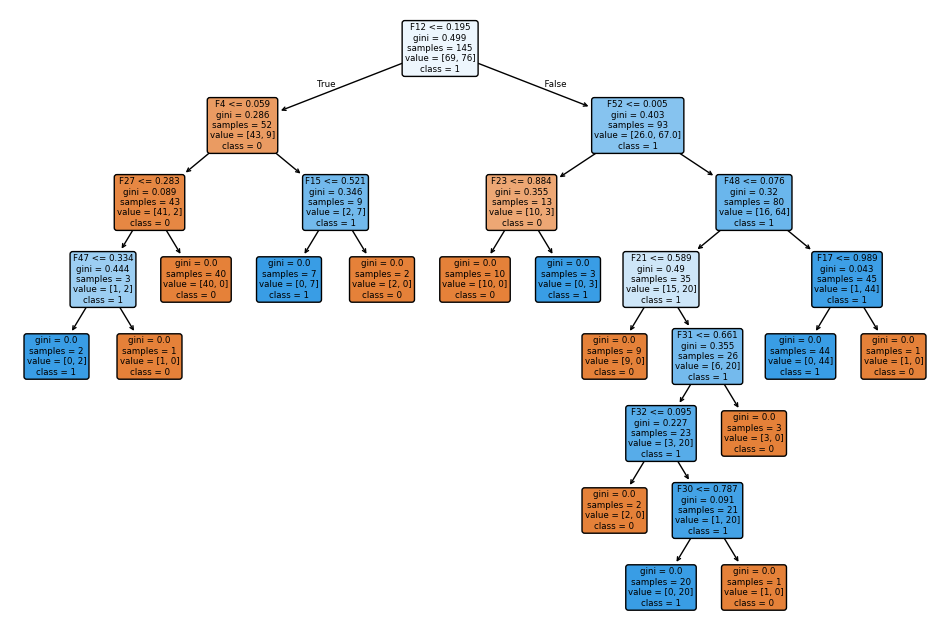

In [506]:
plt.figure(figsize=(12,8))
plot_tree(model,
          feature_names=X.columns,
          class_names=list(map(str, pd.Categorical(y).categories)),
          filled=True,
          rounded=True
          )

Ce que nous remarquons :

**Profondeur de l'arbre** : L'arbre est relativement profond et complexe, avec de nombreuses ramifications. Cela suggère qu'il a appris des motifs assez spécifiques dans les données.

Conditions de division (Splitting Conditions) : Chaque nœud interne (nœud de décision) est basé sur une caractéristique (par exemple, F12, F4, F52, etc.) et un seuil (par exemple, F12 <= 0.195, F4 <= 0.059). C'est ainsi que l'arbre divise les données.

**Impureté Gini** : Le "gini" affiché dans chaque nœud est l'indice d'impureté de Gini. Il mesure la probabilité qu'un élément choisi au hasard dans l'ensemble soit mal classé si classé au hasard selon la distribution des classes dans le nœud. Un gini de 0.0 indique un nœud pur (tous les échantillons appartiennent à la même classe).

**Nombre d'échantillons (samples)** : Le nombre d'échantillons qui arrivent à chaque nœud est indiqué. Cela permet de voir comment les données sont réparties à travers l'arbre.

**Valeur (value)** : La section "value" indique la distribution des classes pour les échantillons qui atteignent ce nœud. Par exemple, value = [69, 76] signifie qu'il y a 69 échantillon de la classe 0 et 76 échantillons de la classe 1 dans ce nœud.

**Classe prédite (class)** : Le "class" indique la classe majoritaire à ce nœud (la prédiction de l'arbre pour ce nœud).

**Complexité et Overfitting potentiel** : Un arbre aussi profond peut être sujet à l'overfitting (surapprentissage), c'est-à-dire qu'il peut très bien fonctionner sur les données d'entraînement mais avoir de mauvaises performances sur de nouvelles données non vues.

**Interprétation des résultats** :

En regardant l'arbre :

**F12 et F52** : Ces deux caractéristiques sont au premier niveau de l'arbre (nœud racine et son premier split droit). Cela signifie qu'elles sont les caractéristiques les plus importantes car elles sont utilisées pour la division initiale et affectent le plus grand nombre d'échantillons. F12 semble être la caractéristique la plus importante car elle est au tout premier nœud.

**F4** : Est également très important car c'est le premier split après F12 sur le chemin "True".

**F27, F15, F23, F48, F21, F17** : Ces caractéristiques sont importantes à un niveau secondaire, car elles divisent des sous-ensembles de données après les premières divisions.

**F47, F31, F32, F30** : Ces caractéristiques semblent être importantes pour des divisions plus spécifiques et plus profondes, affectant des sous-ensembles plus petits d'échantillons.

**En résumé, les caractéristiques qui apparaissent le plus souvent et le plus haut dans l'arbre (proches de la racine) sont les plus discriminantes et donc les plus importantes pour la classification.**

Recherchez et appliquer l’algorithme de forets aléatoires puis comparer les résultats avec ceux des arbres de décision ;

In [511]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)

In [513]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [515]:
print("train:",model.score(X_train, y_train))
print("test:",model.score(X_test, y_test))

train: 1.0
test: 0.7936507936507936


In [521]:
predicted = model.predict(X_test)
expected = y_test

In [523]:
from sklearn.metrics import classification_report
print(classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        28
           1       0.79      0.86      0.82        35

    accuracy                           0.79        63
   macro avg       0.79      0.79      0.79        63
weighted avg       0.79      0.79      0.79        63

